In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from dateutil.parser import parse
from datetime import datetime
import seaborn as sns
import pycountry_convert as pc

# Aviation accidents analysis

In this project we will analyze the reasons why accidents happen in aviation.
An aviation accident is an incident in which an aircraft is damaged or destroyed as a result of a collision, fire, structural failure, or other event. Aviation accidents can be caused by a variety of factors, including mechanical failure, pilot error, adverse weather conditions, and sabotage. Aviation accidents can result in fatalities, injuries, and damage to property.

## I. Datasets

We'll use 2 datasets from Kaggle:
### Dataset 1. Historical Plane Crash Data
This dataset contains all of the plane crashes that happened throughout history. Data are extracted using web scraping methods in R and preprocessed to create an organized and informative dataset.
All data are collected from Ronan Hubert: [Aviation Accident Bureau Archive]
(https://www.baaa-acro.com/)
This is the dataset [here]:(https://www.kaggle.com/datasets/abeperez/historical-plane-crash-data)

### Dataset 2. Aviation Accident Database & Synopses, up to 2023

The dataset is [here](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses)
The NTSB aviation accident database [here](https://www.ntsb.gov/Pages/home.aspx) contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters.

## II. Reading, analyzing the datasets

# Dataset 1 - Historical Plane Crash Data 
This dataset contains all of the plane crashes that happened throughout history. Data are extracted using web scraping methods in R and preprocessed to create an organized and informative dataset.
All data are collected from Ronan Hubert: [Aviation Accident Bureau Archive]
(https://www.baaa-acro.com/)
This is the dataset [here]:(https://www.kaggle.com/datasets/abeperez/historical-plane-crash-data)

### 2.1. Reading

In [2]:
avioset_aab = pd.read_csv('data/dataset_1_accident_bureau/Plane Crashes.csv')

In [3]:
# 28536 rows × 24 columns
print(avioset_aab.shape)
avioset_aab.head()

(28536, 24)


,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,...,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,...,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,...,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,...,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,...,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,...,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown


<div style="background-color: #9df9ef; padding: 10px;"></div>

### Database Fields Description

In [4]:
dataColumnsMeaning = pd.read_csv('data/dataset_1_accident_bureau/AAB_DB_Fields_Description.csv', encoding='utf-8')

In [5]:
dataColumnsMeaning.columns

Index(['Field name', 'Description'], dtype='object')

In [6]:
dataColumnsMeaning.shape

(24, 2)

In [7]:
dataColumnsMeaning.style.set_properties(**{'text-align': 'left'})

,Field name,Description
0,date,Date of accident
1,time,Time of accident
2,aircraft,Manufacturer and exact model involved in the accident
3,operator,"The company, organisation or individual operating the aircraft at the time of the accident"
4,registration,The registrationmark applied on the the aircaft at the time of the accident
5,flight_phase,Phase of flight
6,flight_type,"Flight types refer to the various classifications of flights based on their purpose, nature, or the kind of aircraft operation being conducted"
7,survivors,Number of survivors
8,crash_site,Crash site
9,schedule,Schedule


<div style="background-color: #9df9ef; padding: 10px;"></div>

### 2.2. Dataset cleaning, normalization

#### 2.2.1. Let's see what data do we have in all columns. 

In [8]:
avioset_aab.columns

Index(['Date', 'Time', 'Aircraft', 'Operator', 'Registration', 'Flight phase',
       'Flight type', 'Survivors', 'Crash site', 'Schedule', 'MSN', 'YOM',
       'Flight no.', 'Crash location', 'Country', 'Region', 'Crew on board',
       'Crew fatalities', 'Pax on board', 'PAX fatalities', 'Other fatalities',
       'Total fatalities', 'Circumstances', 'Crash cause'],
      dtype='object')

<div style="background-color: #9df9ef; padding: 10px;"></div>

#### 2.2.2. Let's make our column names more Pythonic, which means changing names like Event.Id to event_id.

In [9]:
# We will make a new dataset so as not to lose the original
avioset_aab_low = avioset_aab.copy()

In [10]:
def change_col_names(df, old_symbol, new_symbol):
    df.columns = df.columns.str.lower().str.replace(old_symbol, new_symbol)
    return df

In [11]:
# Changing column names to pythonic
change_col_names(avioset_aab_low, ' ', '_')

# Changing "flight_no." to "flight_no"
avioset_aab_low.rename(columns={'flight_no.': 'flight_no'}, inplace=True)

avioset_aab_low.columns

Index(['date', 'time', 'aircraft', 'operator', 'registration', 'flight_phase',
       'flight_type', 'survivors', 'crash_site', 'schedule', 'msn', 'yom',
       'flight_no', 'crash_location', 'country', 'region', 'crew_on_board',
       'crew_fatalities', 'pax_on_board', 'pax_fatalities', 'other_fatalities',
       'total_fatalities', 'circumstances', 'crash_cause'],
      dtype='object')

<div style="background-color: #9df9ef; padding: 10px;"></div>

#### 2.2.3. Let's look at the unique values in each column. 
#### Let's count nan values too and decide which columns to use for our further analysis.

In [12]:
# View unique values for all columns
def all_columns_unique_values(df):
    for col in df.columns:
        print(f"Unique values in column \'{col}\': \n {df[col].unique()}\n\n **************** \n")

all_columns_unique_values(avioset_aab_low)

Unique values in column 'date': 
 ['1918-05-02' '1918-06-08' '1918-06-11' ... '2022-05-24' '2022-05-29'
 '2022-06-03']

 **************** 

Unique values in column 'time': 
 [nan '15H 15M 0S' '12H 0M 0S' ... '3H 21M 0S' '2H 53M 0S' '13H 33M 0S']

 **************** 

Unique values in column 'aircraft': 
 ['De Havilland DH.4' 'Handley Page V/1500' 'Avro 504' ...
 'Cirrus Vision SF50' 'Socata TBM-910' 'Learjet 75']

 **************** 

Unique values in column 'operator': 
 ['United States Signal Corps - USSC' 'Handley Page Aircraft Company Ltd'
 'Royal Air Force - RAF' ... 'Raul Ignacion Posada'
 'Yakutat Coastal Airlines' 'GoJump Oceanside']

 **************** 

Unique values in column 'registration': 
 ['AS-32084' 'E4104' 'A8544' ... 'N703TH' '9N-AET' 'N7581F']

 **************** 

Unique values in column 'flight_phase': 
 ['Takeoff (climb)' 'Flight' 'Landing (descent or approach)' nan 'Taxiing'
 'Parking']

 **************** 

Unique values in column 'flight_type': 
 ['Test' 'Training'

In [13]:
# View NAN values in all columns
def all_columns_nan_values(df):
    for col in df.columns:
        print(f"All nan values in column \'{col}\': \n {df[col].isna().sum()}\n\n **************** \n")

all_columns_nan_values(avioset_aab_low)

All nan values in column 'date': 
 0

 **************** 

All nan values in column 'time': 
 14587

 **************** 

All nan values in column 'aircraft': 
 1

 **************** 

All nan values in column 'operator': 
 0

 **************** 

All nan values in column 'registration': 
 815

 **************** 

All nan values in column 'flight_phase': 
 638

 **************** 

All nan values in column 'flight_type': 
 57

 **************** 

All nan values in column 'survivors': 
 1297

 **************** 

All nan values in column 'crash_site': 
 383

 **************** 

All nan values in column 'schedule': 
 8946

 **************** 

All nan values in column 'msn': 
 4182

 **************** 

All nan values in column 'yom': 
 5311

 **************** 

All nan values in column 'flight_no': 
 28536

 **************** 

All nan values in column 'crash_location': 
 12

 **************** 

All nan values in column 'country': 
 1

 **************** 

All nan values in column 'region': 
 1



#### 2.2.4. We will take as the most useful and with relevant data columns
'date', 'aircraft', 'operator', 'flight_phase', 'flight_type', 'survivors', 'crash_site', 'crash_location', 'country', 'region', 'crew_on_board', 'crew_fatalities', 'pax_on_board', 'pax_fatalities', 'other_fatalities','total_fatalities', 'crash_cause'
#### Additionally all nan values for crew_on_board, crew_fatalities, pax_on_board,  pax_fatalities, other_fatalities, total_fatalities are not so big number so we'll give them value (-1).

In [14]:
avioset = avioset_aab_low[['date', 'aircraft', 'operator', 'flight_phase', 'flight_type', 'survivors', 'crash_site', 'crash_location', 'country', 'region', 'crew_on_board', 'crew_fatalities', 'pax_on_board', 'pax_fatalities', 'other_fatalities','total_fatalities', 'crash_cause']]

print(avioset.shape)
avioset.head()

(28536, 17)


,date,aircraft,operator,flight_phase,flight_type,survivors,crash_site,crash_location,country,region,crew_on_board,crew_fatalities,pax_on_board,pax_fatalities,other_fatalities,total_fatalities,crash_cause
0,1918-05-02,De Havilland DH.4,United States Signal Corps - USSC,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton-McCook Field Ohio,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,Technical failure
1,1918-06-08,Handley Page V/1500,Handley Page Aircraft Company Ltd,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood London Metropolis,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,Technical failure
2,1918-06-11,Avro 504,Royal Air Force - RAF,Flight,Training,Yes,"Plain, Valley",Abukir (Abu Qir) Alexandria,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,Unknown
3,1918-06-19,De Havilland DH.4,United States Signal Corps - USSC,Flight,Military,No,Airport (less than 10 km from airport),Wright-Patterson AFB (Dayton) Ohio,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,Technical failure
4,1918-06-24,Breguet 14,French Air Force - Armée de l'Air,Landing (descent or approach),Military,Yes,NaN,France All France,France,Europe,NaN,0.0,NaN,0.0,0.0,0,Unknown


In [15]:
avioset.columns

Index(['date', 'aircraft', 'operator', 'flight_phase', 'flight_type',
       'survivors', 'crash_site', 'crash_location', 'country', 'region',
       'crew_on_board', 'crew_fatalities', 'pax_on_board', 'pax_fatalities',
       'other_fatalities', 'total_fatalities', 'crash_cause'],
      dtype='object')

Additionally all nan values for crew_on_board, crew_fatalities, pax_on_board, pax_fatalities, other_fatalities, total_fatalities are not so big number so we'll give them value (-1).

In [16]:
avioset = avioset.fillna(
    {'crew_on_board':-1,
     'crew_fatalities':-1,
     'pax_on_board':-1,
     'pax_fatalities':-1,
     'other_fatalities':-1,
     'total_fatalities':-1
    })

In [17]:
# Nan in survivors we'll fill with "unknown"
avioset = avioset.fillna({'survivors':"unknown"})

In [18]:
# View NAN values in all columns
all_columns_nan_values(avioset)

All nan values in column 'date': 
 0

 **************** 

All nan values in column 'aircraft': 
 1

 **************** 

All nan values in column 'operator': 
 0

 **************** 

All nan values in column 'flight_phase': 
 638

 **************** 

All nan values in column 'flight_type': 
 57

 **************** 

All nan values in column 'survivors': 
 0

 **************** 

All nan values in column 'crash_site': 
 383

 **************** 

All nan values in column 'crash_location': 
 12

 **************** 

All nan values in column 'country': 
 1

 **************** 

All nan values in column 'region': 
 1

 **************** 

All nan values in column 'crew_on_board': 
 0

 **************** 

All nan values in column 'crew_fatalities': 
 0

 **************** 

All nan values in column 'pax_on_board': 
 0

 **************** 

All nan values in column 'pax_fatalities': 
 0

 **************** 

All nan values in column 'other_fatalities': 
 0

 **************** 

All nan values in column 

<div style="background-color: #9df9ef; padding: 10px;"></div>

#### 2.2.5. Let's convert date to datetime 

In [19]:
avioset.date.unique

<bound method Series.unique of 0        1918-05-02
1        1918-06-08
2        1918-06-11
3        1918-06-19
4        1918-06-24
            ...    
28531    2022-05-20
28532    2022-05-23
28533    2022-05-24
28534    2022-05-29
28535    2022-06-03
Name: date, Length: 28536, dtype: object>

In [20]:
avioset['date'] = pd.to_datetime(avioset['date'])

In [21]:
avioset.date.unique

<bound method Series.unique of 0       1918-05-02
1       1918-06-08
2       1918-06-11
3       1918-06-19
4       1918-06-24
           ...    
28531   2022-05-20
28532   2022-05-23
28533   2022-05-24
28534   2022-05-29
28535   2022-06-03
Name: date, Length: 28536, dtype: datetime64[ns]>

In [22]:
# Let's add column year
avioset['year'] = pd.DatetimeIndex(avioset['date']).year

In [23]:
# Let's add column month
avioset['month'] = pd.DatetimeIndex(avioset['date']).month

In [24]:
avioset['year'].unique()

array([1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928,
       1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022])

In [25]:
avioset['month'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4])

<Axes: xlabel='year'>

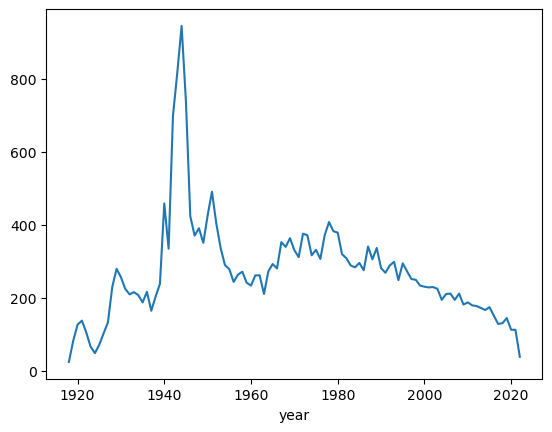

In [26]:
# Plotting accidents by year
avioset.groupby(['year']).size().plot()

#### 2.2.6. What is the year with most accidents?

In [27]:
# It's 1944 - the second war
print(avioset.groupby('year').size().sort_values(ascending=False))

year
1944    945
1943    817
1945    737
1942    698
1951    491
       ... 
1925     72
1923     67
1924     49
2022     39
1918     25
Length: 105, dtype: int64


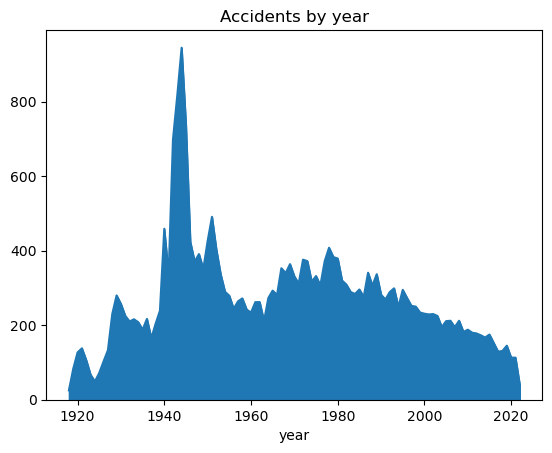

In [28]:
avioset.groupby('year').size().plot.area()
plt.title("Accidents by year")
plt.show()

#### 2.2.7. What is the month with most accidents?

In [29]:
# It's 12 but let's analyze further
print(avioset.groupby('month').size().sort_values(ascending=False))

month
12    2683
8     2523
1     2478
7     2435
9     2399
5     2360
11    2354
3     2344
10    2293
6     2258
4     2255
2     2154
dtype: int64


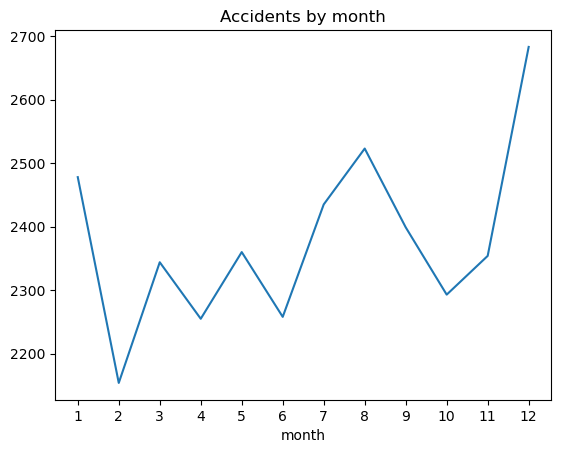

In [30]:
avioset.groupby('month').size().plot()
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.title("Accidents by month")
plt.show()

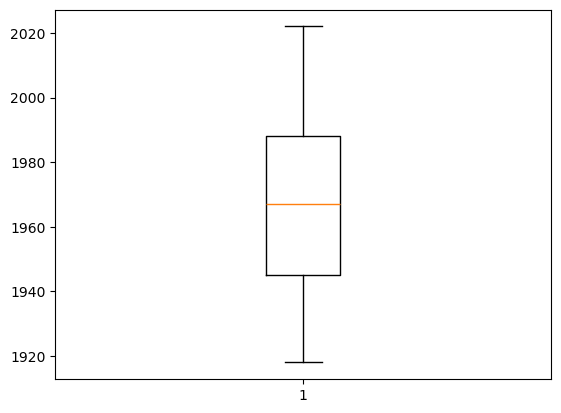

In [31]:
plt.boxplot(avioset.year)
plt.show()

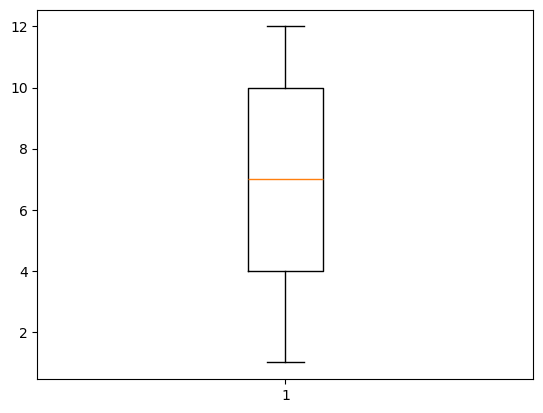

In [32]:
plt.boxplot(avioset.month)
plt.show()

#### 2.2.9. Flight phases
Picture is from https://docs.flybywiresim.com/pilots-corner/advanced-guides/flight-phases/
![Flight phases](data/images/flight-phases.png)

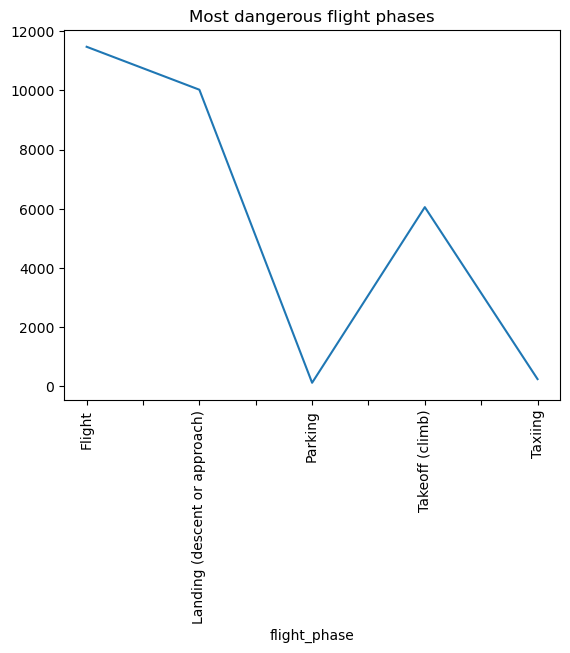

In [33]:
avioset.groupby('flight_phase').size().plot()
plt.xticks(rotation = "vertical")
plt.title("Most dangerous flight phases")
plt.show()

In [34]:
print(avioset.groupby('flight_phase').size().sort_values(ascending=False))

flight_phase
Flight                           11475
Landing (descent or approach)    10023
Takeoff (climb)                   6052
Taxiing                            236
Parking                            112
dtype: int64


### Conclusion: Most dangerous flight phases are Flight, Landing and Takeoff. They need most concentration.

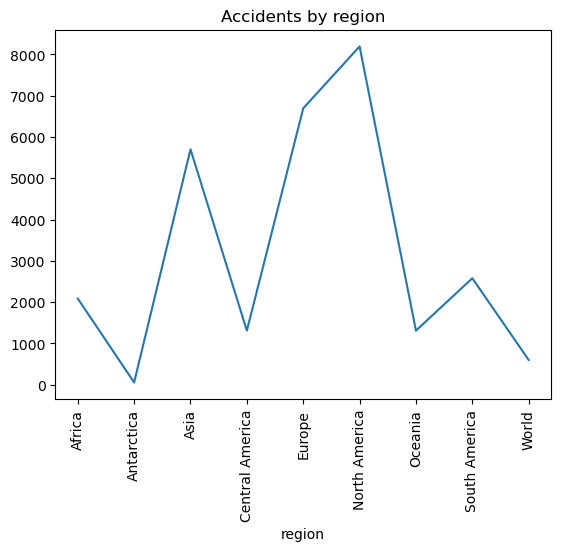

In [40]:
avioset.groupby('region').size().plot()
plt.xticks(rotation = "vertical")
plt.title("Accidents by region")
plt.show()

<div style="background-color: #9df9ef; padding: 10px;"></div>

#### 2.2.6. How many na we have? Should we replace or not? 
- TODO


<div style="background-color: #9df9ef; padding: 10px;"></div>

#### 2.2.7. Let's convert date columns into datetime 
- TODO

<div style="background-color: #9df9ef; padding: 10px;"></div>

#### 2.2.8. Let's take a look on the summary of statistics for numerical columns - It's good idea first to change some dtypes !!

<div style="background-color: #9df9ef; padding: 10px;"></div>